# Today you are a Machine Learning Engineer in the Department of Marketing and Inventory @ Walmart Labs.
This work relies on processed data from Kaggle https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

This work is motivated by the publication https://arxiv.org/pdf/2010.02503.pdf

*You have access to the Walmart server data, specifically the Electronics section, such that you have NO customer facing information, but you do have access to timestamped data regarding product viewing/carting/purchasing. We will use this data to build a model of whether a not some product will be purchased.*

### If running this notebook in Google Colab, run the following cell first to mount your Google Drive

In [77]:
#from google.colab import drive
#drive.mount('/content/drive')

^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

## Task 1: Read in the data

You should have four files:

* `some_column_descriptions.png`
* `user_journey_descriptions.png`
* `X_train.csv`
* `X_test.csv`

We'll start by looking at the descriptions before loading in the csv files.

1. Use the `IPython.display` module to view the `some_column_descriptions.png` file.

    Look through the column names and descriptions to get an idea of what the data is.

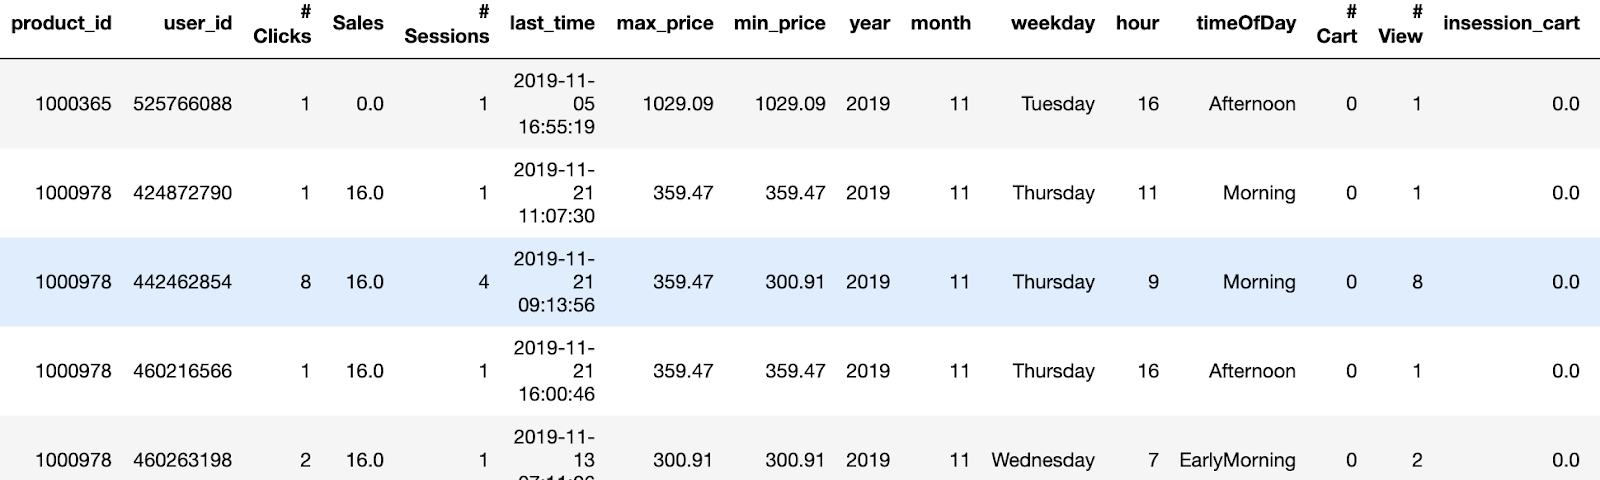

In [78]:
from IPython.display import Image, display
# change the filename to wherever you downloaded/uploaded the file
filename = 'data_sample.png'
display(Image(filename=filename))

The dataset has User-journey data, i.e. it tracks information user/product pairs over time to see if the combination results in a purchase.

2. Look at the `user_journey_descriptions.png` file.

    Review the data sample to get a sense of what information we are tracking for each user/product pair.

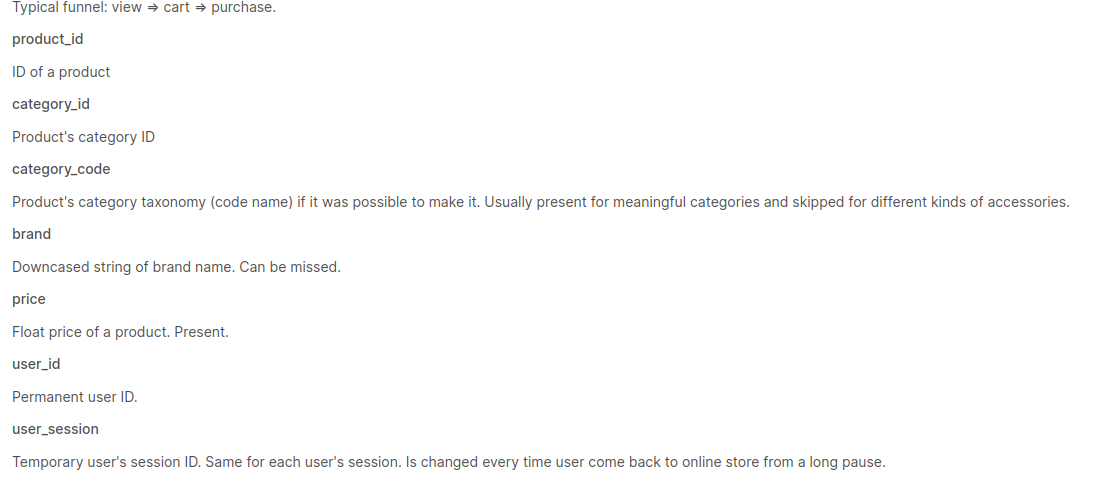

In [79]:
# change path to wherever you uploaded/downloaded the file
filename='columns_description.png'
display(Image(filename=filename))

The dataset we are working with is essentially what we have screenshotted above, but has been anonomized by removing product IDs and user IDs.

3. Use the pandas `read_csv()` and `head()` functions to read in the training data (`X_train.csv`) and look at the first few rows.

    Note the Purchase column has either 0 (not purchased) or 1 (purchased).

In [80]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('X_train.csv')
train_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    154.41    154.41   
1                     1            1              0.0     92.67     92.67   
2                     1            1              0.0    155.71    155.71   
3                     1            1              0.0    898.32    898.32   
4                     1            1              0.0    146.21    146.21   

   NumCart  NumView  InsessionCart  InsessionView  year  month weekday  \
0        0        1              0              1  2019     11     Sat   
1        0        1              0              1  2019     11      Fr   
2        0        1              0              1  2019     11     Thu   
3        0        1              0              1  2019     11     Mon   
4        0        1              0              1  2019     11     Tue   

   timeOfDay  Weekend  Purchase  
0    Morning        0         0  
1       Dawn        0         0  
2  Afternoon        0         0  
3       Noon        0         0  
4       Noon        0         0

4. Similarly, read in the test data (`X_test.csv`) and look at the first few rows.

In [81]:
test_df = pd.read_csv('X_test.csv')
test_df.head()
# [YOUR CODE HERE]

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    126.86    126.86   
1                     2            2            182.0    118.38    118.38   
2                     1            1              0.0     63.77     63.77   
3                     1            1              0.0     32.18     32.18   
4                     1            1              0.0   1093.72   1093.72   

   NumCart  NumView  InsessionCart  InsessionView  year  month weekday  \
0        0        1              0              1  2019     11     Wed   
1        0        2              0              1  2019     11      Fr   
2        0        1              0              1  2019     11      Fr   
3        0        1              0              3  2019     11      Fr   
4        0        1              0              2  2019     11     Sat   

      timeOfDay  Weekend  Purchase  
0  EarlyMorning        0         0  
1  EarlyMorning        0         0  
2       Morning        0         0  
3  EarlyMorning        0         0  
4  EarlyMorning        0         0

## Task 2: Understand the Data

*Our goal in this assignment is to predict whether a customer/product pair will result in a purchase. As part of this, we will want to identify what features are most important for making this classification.*

We'll start with digging into our dataset.

1. For the training data, print out the datatype of each feature (column), and identify which ones are non-numeric

In [82]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645816 entries, 0 to 645815
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NumOfEventsInJourney  645816 non-null  int64  
 1   NumSessions           645816 non-null  int64  
 2   interactionTime       645816 non-null  float64
 3   maxPrice              645816 non-null  float64
 4   minPrice              645816 non-null  float64
 5   NumCart               645816 non-null  int64  
 6   NumView               645816 non-null  int64  
 7   InsessionCart         645816 non-null  int64  
 8   InsessionView         645816 non-null  int64  
 9   year                  645816 non-null  int64  
 10  month                 645816 non-null  int64  
 11  weekday               645816 non-null  object 
 12  timeOfDay             645816 non-null  object 
 13  Weekend               645816 non-null  int64  
 14  Purchase              645816 non-null  int64  
dtype

2. Print the unique values for the year, month and weekend features.

In [83]:
print(train_df['year'].value_counts())
print(train_df['month'].value_counts())
print(train_df['Weekend'].value_counts())

2019    645816
Name: year, dtype: int64
11    645816
Name: month, dtype: int64
0    645816
Name: Weekend, dtype: int64


3. Since these columns each only have one unique value, they will not be valuable features, so drop the three columns in both the training set and the test set.

    Make sure to use `inplace=True` to modify the DataFrame.
    
    Print the shape of the DataFrames to verify the columns were dropped.

In [84]:
train_df = train_df.drop(['year', 'month', 'Weekend'], axis= 1)
train_df.head()
test_df = test_df.drop(['year', 'month', 'Weekend'], axis= 1)
test_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    126.86    126.86   
1                     2            2            182.0    118.38    118.38   
2                     1            1              0.0     63.77     63.77   
3                     1            1              0.0     32.18     32.18   
4                     1            1              0.0   1093.72   1093.72   

   NumCart  NumView  InsessionCart  InsessionView weekday     timeOfDay  \
0        0        1              0              1     Wed  EarlyMorning   
1        0        2              0              1      Fr  EarlyMorning   
2        0        1              0              1      Fr       Morning   
3        0        1              0              3      Fr  EarlyMorning   
4        0        1              0              2     Sat  EarlyMorning   

   Purchase  
0         0  
1         0  
2         0  
3         0  
4         0

4. For each non-numeric feature, print the unique values.

In [85]:
non_numeric_columns = train_df.select_dtypes(include=np.object)
for col in non_numeric_columns:
    # Print the counts of each unique value in the current column
    print(train_df[col].value_counts())

Sat    126504
Fr     123677
Sun    110305
Thu     78638
Mon     71479
Tue     67850
Wed     67363
Name: weekday, dtype: int64
Afternoon       165214
EarlyMorning    136248
Evening         110578
Morning         103407
Dawn             80495
Noon             34242
Night            15632
Name: timeOfDay, dtype: int64


/var/folders/gd/k530dpdn0b7bp0679ks43_th0000gn/T/ipykernel_1316/3181935740.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  non_numeric_columns = train_df.select_dtypes(include=np.object)


5. Convert the non-numeric features to numeric. These feature values are ordered temporally, so this makes some sense to do.

    Follow the example given for the weekday column to update the dayOfWeek column.
    
    Use the `.head()` method to inspect the dataset after the transformations.

In [86]:
weekday_strings = ['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun']
weekday_ints = [1, 2, 3, 4, 5, 6, 7]
train_df['weekday'] = train_df['weekday'].replace(weekday_strings, weekday_ints)
train_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    154.41    154.41   
1                     1            1              0.0     92.67     92.67   
2                     1            1              0.0    155.71    155.71   
3                     1            1              0.0    898.32    898.32   
4                     1            1              0.0    146.21    146.21   

   NumCart  NumView  InsessionCart  InsessionView  weekday  timeOfDay  \
0        0        1              0              1        6    Morning   
1        0        1              0              1        5       Dawn   
2        0        1              0              1        4  Afternoon   
3        0        1              0              1        1       Noon   
4        0        1              0              1        2       Noon   

   Purchase  
0         0  
1         0  
2         0  
3         0  
4         0

In [87]:
train_df['timeOfDay'] = train_df['timeOfDay'].replace(['Dawn','EarlyMorning','Morning','Noon','Afternoon','Evening','Night'],[1,2,3,4,5,6,7])
train_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    154.41    154.41   
1                     1            1              0.0     92.67     92.67   
2                     1            1              0.0    155.71    155.71   
3                     1            1              0.0    898.32    898.32   
4                     1            1              0.0    146.21    146.21   

   NumCart  NumView  InsessionCart  InsessionView  weekday  timeOfDay  \
0        0        1              0              1        6          3   
1        0        1              0              1        5          1   
2        0        1              0              1        4          5   
3        0        1              0              1        1          4   
4        0        1              0              1        2          4   

   Purchase  
0         0  
1         0  
2         0  
3         0  
4         0

6. Do the same conversions for the test set.

    Make sure to inspect the dataset to make sure it look as expected.

In [88]:
test_df['weekday'] = test_df['weekday'].replace(weekday_strings, weekday_ints)
test_df['timeOfDay'] = test_df['timeOfDay'].replace(['Dawn','EarlyMorning','Morning','Noon','Afternoon','Evening','Night'],[1,2,3,4,5,6,7])
test_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    126.86    126.86   
1                     2            2            182.0    118.38    118.38   
2                     1            1              0.0     63.77     63.77   
3                     1            1              0.0     32.18     32.18   
4                     1            1              0.0   1093.72   1093.72   

   NumCart  NumView  InsessionCart  InsessionView  weekday  timeOfDay  \
0        0        1              0              1        3          2   
1        0        2              0              1        5          2   
2        0        1              0              1        5          3   
3        0        1              0              3        5          2   
4        0        1              0              2        6          2   

   Purchase  
0         0  
1         0  
2         0  
3         0  
4         0

7. Use the `Purchase` columns of train and test datasets to determine the proportion of user journeys which result in purchases, in both the training and test datasets.

    Are the datasets balanced?

In [89]:
print(train_df['Purchase'].value_counts())
print(test_df['Purchase'].value_counts())

0    636839
1      8977
Name: Purchase, dtype: int64
0    424424
1      6120
Name: Purchase, dtype: int64


## Task 3: Reduce the number of features

1. How many features does our dataset currently have?

In [90]:
train_df_no_purchase = train_df.drop(['Purchase'], axis=1)
print(f'The training data currently has {train_df_no_purchase.shape[1]} features')

The training data currently has 11 features


2. Draw a heatmap of the Pearson correlation.

    The plotting code is given to you, but you need to fill in the calculation of the Pearson correlation.

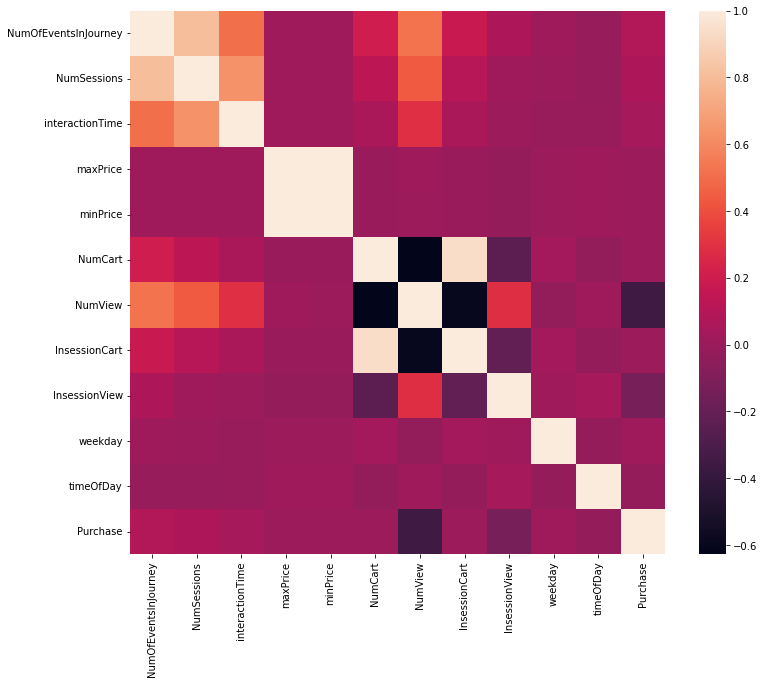

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
cor = train_df.corr(method='pearson')
sns.heatmap(cor);

3. Drop the features with high correlation.

    We'll do this by looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair.

    Store the remaining set of features (the ones you didn't drop) in dataframes `train_df_reduced`.

In [92]:
# Create correlation matrix
corr_matrix = train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features
train_df_reduced = train_df.drop(to_drop, axis=1)
train_df_reduced.head()

/var/folders/gd/k530dpdn0b7bp0679ks43_th0000gn/T/ipykernel_1316/717129167.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


NumOfEventsInJourney  interactionTime  maxPrice  NumCart  NumView  \
0                     1              0.0    154.41        0        1   
1                     1              0.0     92.67        0        1   
2                     1              0.0    155.71        0        1   
3                     1              0.0    898.32        0        1   
4                     1              0.0    146.21        0        1   

   InsessionView  weekday  timeOfDay  Purchase  
0              1        6          3         0  
1              1        5          1         0  
2              1        4          5         0  
3              1        1          4         0  
4              1        2          4         0

5. How many columns are left in the DataFrame?

In [93]:
train_df_no_purchase = train_df_reduced.drop(['Purchase'], axis=1)
print(f'The training data currently has {train_df_no_purchase.shape[1]} features')

The training data currently has 8 features


5. Remove the same features from the test set and save in a new dataframe `test_df_reduced`.

In [94]:
# Create correlation matrix
corr_matrix = test_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features
test_df_reduced = test_df.drop(to_drop, axis=1)
test_df_reduced.head()


/var/folders/gd/k530dpdn0b7bp0679ks43_th0000gn/T/ipykernel_1316/2942029733.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


NumOfEventsInJourney  interactionTime  maxPrice  NumCart  NumView  \
0                     1              0.0    126.86        0        1   
1                     2            182.0    118.38        0        2   
2                     1              0.0     63.77        0        1   
3                     1              0.0     32.18        0        1   
4                     1              0.0   1093.72        0        1   

   InsessionView  weekday  timeOfDay  Purchase  
0              1        3          2         0  
1              1        5          2         0  
2              1        5          3         0  
3              3        5          2         0  
4              2        6          2         0

In [95]:
test_df_no_purchase = test_df_reduced.drop(['Purchase'], axis=1)
test_df_no_purchase.head()
print(f'The testing data currently has {test_df_no_purchase.shape[1]} features')

The testing data currently has 8 features


6. Visualize the selected features. (Ignore the warning messages about distplot.)
    
    If you have time, experiment with some other visualizations of the data.

/Users/camilagaitanmosquera/.conda/envs/Fourthbrain-ML-Training/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/camilagaitanmosquera/.conda/envs/Fourthbrain-ML-Training/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/camilagaitanmosquera/.conda/envs/Fourthbrain-ML-Training/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be remove

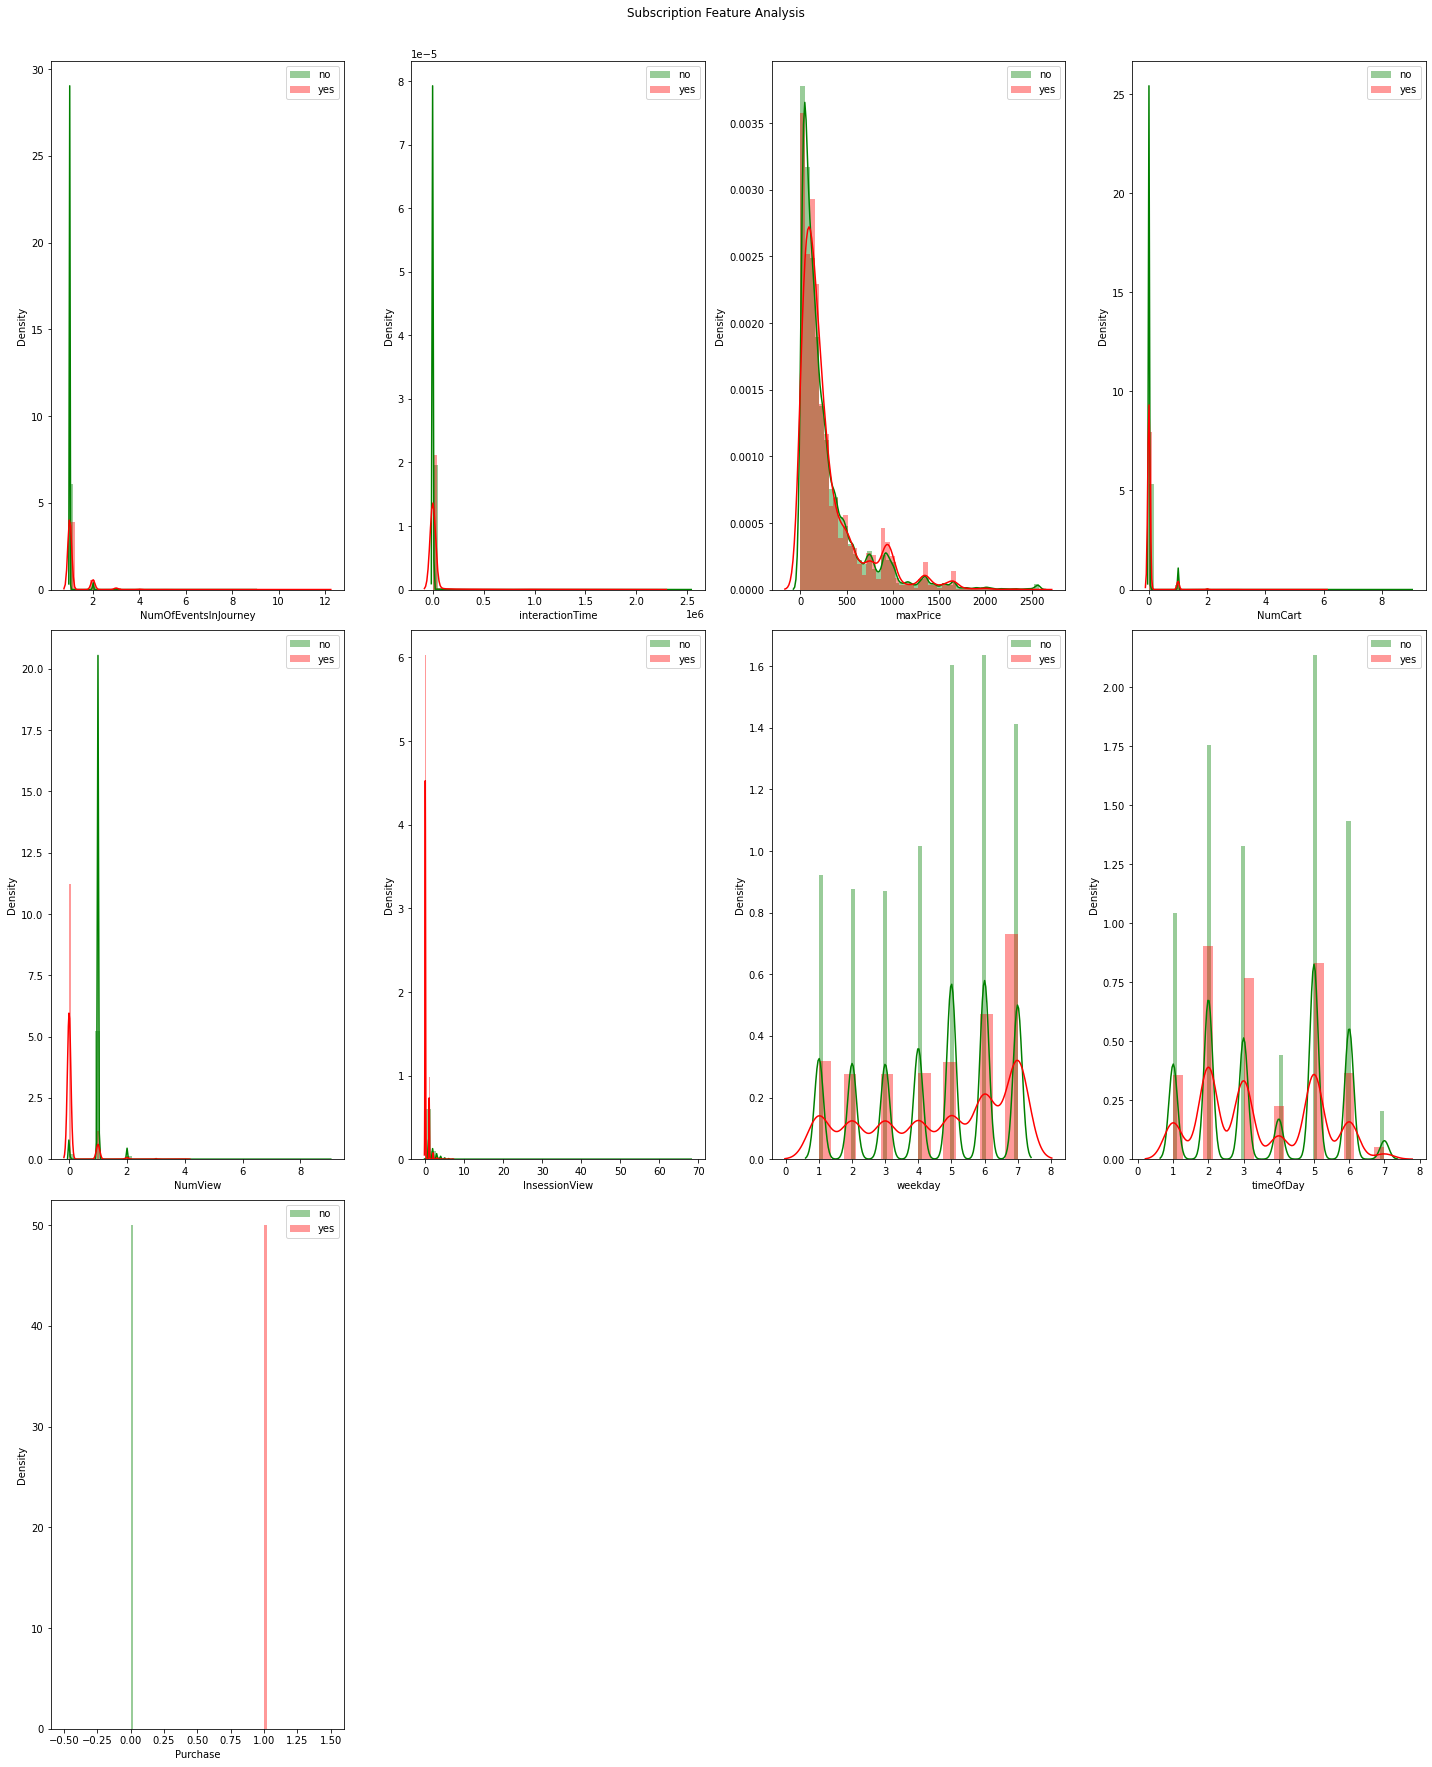

In [96]:
fig = plt.figure(figsize=(20, 25))
j = 0
for i in train_df_reduced.columns:
    plt.subplot(3, 4, j + 1)
    j += 1
    sns.distplot(train_df_reduced[i][train_df_reduced['Purchase'] == 0], color='g', label='no')
    sns.distplot(train_df_reduced[i][train_df_reduced['Purchase'] == 1], color='r', label='yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

7. Make the NumPy arrays `X_train_reduced`, `X_test_reduced`, `y_train` and `y_test` from `train_df_reduced` and `test_df_reduced`.

In [97]:
y_train = train_df_reduced['Purchase'].values
y_test = test_df_reduced['Purchase'].values

X_train_reduced = train_df_reduced.drop(['Purchase'], axis=1).values
X_test_reduced = test_df_reduced.drop(['Purchase'], axis=1).values

8. Scale the features in `X_train_reduced` and `X_test_reduced` so that the max norm of each feature is 1.

In [98]:
from sklearn.preprocessing import normalize  # you can use this module, (but you don't have to)
X_train_reduced = normalize(X_train_reduced, axis=0, norm='max')
X_test_reduced = normalize(X_test_reduced, axis=0, norm='max')

In the cell below we show you how to use a Random Forest to rank features based on a measure of importance called the Gini Importance. We'll provide you with all the code, but you may want to read up on sklearn's [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and its [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier.feature_importances_) property.

9. Look at the results below to note the most important features.

Feature ranking:
1. NumCart (feature 3) (0.487868)
2. NumView (feature 4) (0.385986)
3. InsessionView (feature 5) (0.071081)
4. NumOfEventsInJourney (feature 0) (0.030089)
5. interactionTime (feature 1) (0.010499)
6. weekday (feature 6) (0.005864)
7. maxPrice (feature 2) (0.005489)
8. timeOfDay (feature 7) (0.003125)


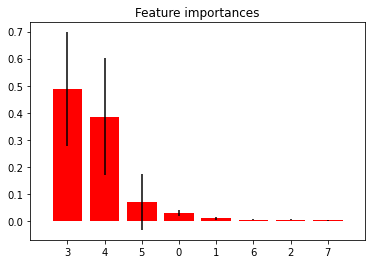

In [99]:
# Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train_reduced, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_reduced.shape[1]):
    print("%d. %s (feature %d) (%f)" %
          (f + 1, train_df_reduced.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_reduced.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_reduced.shape[1]), indices)
plt.xlim([-1, X_train_reduced.shape[1]]);

Thus features 3 and 4 (numcart, numview) are the top two most important features (according to the Random Forest model). We'll use these two features, along with interaction time (feature 1) for visualization of the data, but we'll fit classification models using all 6 of the features. Let's set up a convenient function for the visualization with the numcart and numview features.

In [100]:
# This function visualizes the classification output on a scatter plot,
# indicating the 4 types of outputs in a confusion matrix 
# (True Positive, True Negative, False Negative, False Positive)
from mpl_toolkits import mplot3d
def visualize_scatter_plot(X, y, yhat, title):
    loc11 = np.where((y > 0) & (yhat > 0), 1, 0) #TP
    loc00 = np.where((y == 0) & (yhat == 0), 1, 0) #TN
    loc10 = np.where((y > 0) & (yhat == 0), 1, 0) #FN
    loc01 = np.where((y == 0) & (yhat > 0), 1, 0) #FP
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    ax.scatter3D(
        X[np.where(loc00 > 0), 3],
        X[np.where(loc00 > 0), 4],
        X[np.where(loc00 > 0), 1],
        color='blue',
        marker='o')
    ax.scatter3D(
        X[np.where(loc10 > 0), 3],
        X[np.where(loc10 > 0), 4],
        X[np.where(loc10 > 0), 1],
        color='cyan',
        marker='o')
    ax.scatter3D(
        X[np.where(loc11 > 0), 3],
        X[np.where(loc11 > 0), 4],
        X[np.where(loc11 > 0), 1],
        color='orange',
        marker='^')
    ax.scatter3D(
        X[np.where(loc01 > 0), 3],
        X[np.where(loc01 > 0), 4],
        X[np.where(loc01 > 0), 1],
        color='green',
        marker='^')
    ax.set_xlabel('NumCart')
    ax.set_ylabel('NumViews')
    ax.set_zlabel('InteractionTime')
    plt.title(title)
    plt.show()

## Task 4: Build Logistic Regression and SVM models

We will be fitting both a Logistic Regression and SVM model to the reduced features and then looking at classification metrics such as Accuracy, Precision, Recall, and F1-score.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

1. Instantiate, train, and predict with the Logistic Regression model.

    Make sure to account for the imbalanced classes with with `class_weight` parameter.

    Remember to use the ***train*** data for building the model and the ***test*** data when making and evaluating the predictions

In [102]:
regressor = LogisticRegression(random_state = 0, class_weight = 'balanced')
regressor = regressor.fit(X_train_reduced, y_train)
regressor_prediction = regressor.predict(X_test_reduced)

2. Calculate these classification metrics for the Logistic Regression model:

    * accuracy
    * precision
    * recall
    * f1 score
    * confusion matrix

In [103]:
cm_lr = confusion_matrix(y_test, regressor_prediction)
acc_lr = accuracy(y_test,regressor_prediction)
rec_lr   = recall(y_test, regressor_prediction)
prec_lr  = precision(y_test,regressor_prediction)
f1_lr   = f1_score(y_test,regressor_prediction)

3. Use the `visualize_scatter_plot()` function to visualize the performance of the Logistic Regression model.

Accuracy = 0.9990988145230221, Precision = 0.949357165255566, Recall = 0.9893790849673203, F1-score = 0.9689550328052489
Confusion Matrix is:
[[424101    323]
 [    65   6055]]


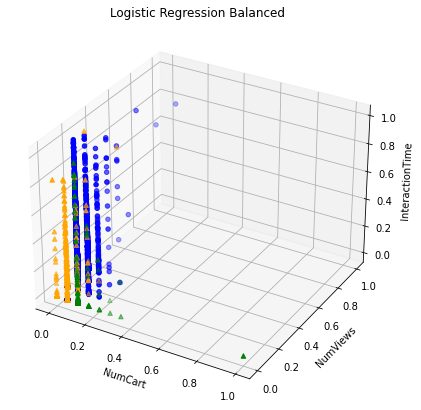

In [104]:
print(f'Accuracy = {acc_lr}, Precision = {prec_lr}, Recall = {rec_lr}, F1-score = {f1_lr}')
print('Confusion Matrix is:')
print(cm_lr)
visualize_scatter_plot(X_test_reduced,y_test,regressor_prediction,'Logistic Regression Balanced')

4. Instantiate, train and predict with the SVM mode.

    Again, remember to account fo the imbalanced classes.

In [105]:
svm = LinearSVC(class_weight="balanced")
svm = svm.fit(X_train_reduced, y_train)
svm_pred=  svm.predict(X_test_reduced)

/Users/camilagaitanmosquera/.conda/envs/Fourthbrain-ML-Training/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


5. Calculate the classification metrics for the SVM model.

In [106]:

cm_svm = confusion_matrix(y_test, svm_pred)
acc_svm = accuracy(y_test,svm_pred)
rec_svm   = recall(y_test, svm_pred)
pre_svm  = precision(y_test,svm_pred)
f1_svm    = f1_score(y_test,svm_pred)

print(f'Accuracy = {acc_svm}, Precision = {pre_svm}, Recall = {rec_svm}, F1-score = {f1_svm}')
print('Confusion Matrix is:')
print(cm_svm)

Accuracy = 0.9997932847746107, Precision = 0.9952373131877156, Recall = 0.9901960784313726, F1-score = 0.9927102956835121
Confusion Matrix is:
[[424395     29]
 [    60   6060]]


6. Use the `visualize_scatter_plot()` function to visualize the performance of the SVM model.

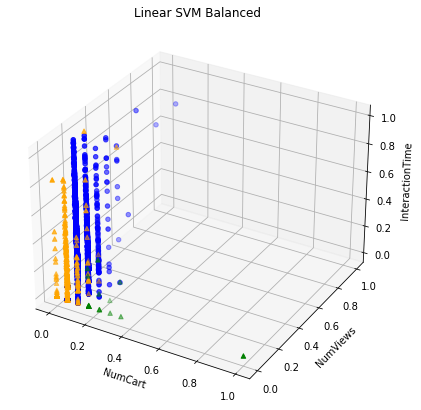

In [107]:
visualize_scatter_plot(X_test_reduced ,y_test,svm_pred,'Linear SVM Balanced')

## Task 5: Fit a Non-Linear Classifier, the Gradient Boosted Tree.

1. Instantiate, train, and predict with the Gradient Boosted Trees model.

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(random_state = 0)
gbt_model = gbt_model.fit(X_train_reduced,y_train)
gbt_pred = gbt_model.predict(X_test_reduced)

2. Evaluate the model by calculating the classification metrics.

In [109]:
cm_gbt = confusion_matrix(y_test, gbt_pred)
acc_gbt = accuracy(y_test,gbt_pred)
rec_gbt  = recall(y_test, gbt_pred)
prec_gbt  = precision(y_test,gbt_pred)
f1_gbt    = f1_score(y_test,gbt_pred)
print(f'Accuracy = {acc_gbt }, Precision = {prec_gbt }, Recall = {rec_gbt }, F1-score = {f1_gbt }')
print('Confusion Matrix is:')
print(cm_gbt)

Accuracy = 0.9990802333791668, Precision = 0.9542857142857143, Recall = 0.9823529411764705, F1-score = 0.9681159420289855
Confusion Matrix is:
[[424136    288]
 [   108   6012]]


3. Visualize the performance with the `visualize_scatter_plot()` function.

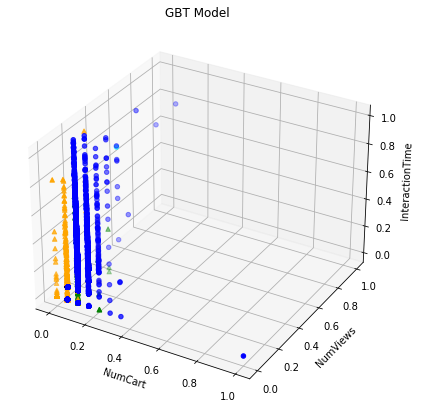

In [110]:
visualize_scatter_plot(X_test_reduced,y_test,gbt_pred,'GBT Model')

## Task 6: Analyze importace of data sample balancing using a Random Forest

1. Instantiate, train, predict with, and evaluate an unbalanced random forest classifier. (Follow the same steps you did above with the other models)

Accuracy = 0.9983625366977591, Precision = 0.999262400885119, Recall = 0.8854575163398692, F1-score = 0.9389240232175344
Confusion Matrix is:
[[424420      4]
 [   701   5419]]


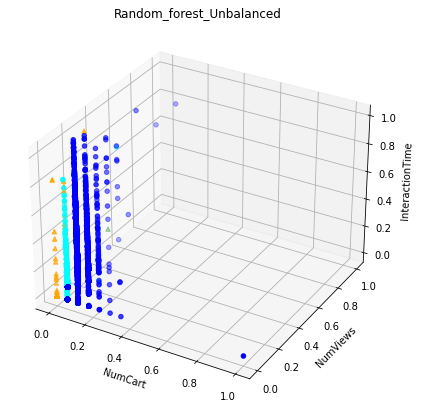

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 0)
rf_model = rf_model.fit(X_train_reduced,y_train)
rf_prediction = rf_model.predict(X_test_reduced)


cm_tree = confusion_matrix(y_test, rf_prediction)
acc_tree = accuracy(y_test,rf_prediction)
rec_tree   = recall(y_test, rf_prediction)
prec_tree  = precision(y_test,rf_prediction)
f1_tree    = f1_score(y_test,rf_prediction)

print(f'Accuracy = {acc_tree}, Precision = {prec_tree}, Recall = {rec_tree}, F1-score = {f1_tree}')
print('Confusion Matrix is:')
print(cm_tree)
visualize_scatter_plot(X_test_reduced, y_test, rf_prediction, 'Random_forest_Unbalanced')

2. Repeat the previous exercise, but this time, incorporate class-balanced penalty weights

Accuracy = 0.9989989408748002, Precision = 0.9920428991523957, Recall = 0.9370915032679739, F1-score = 0.9637845559196706
Confusion Matrix is:
[[424378     46]
 [   385   5735]]


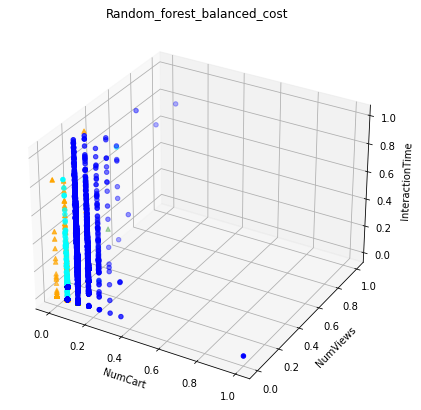

In [112]:
rf_balanced_model = RandomForestClassifier(random_state = 0, class_weight='balanced')
rf_balanced_model = rf_balanced_model.fit(X_train_reduced,y_train)
rf_balanced_prediction = rf_balanced_model.predict(X_test_reduced)


cm_balanced_tree = confusion_matrix(y_test, rf_balanced_prediction)
acc_balanced_tree = accuracy(y_test,rf_balanced_prediction)
rec_balanced_tree   = recall(y_test, rf_balanced_prediction)
prec_balanced_tree  = precision(y_test,rf_balanced_prediction)
f1_balanced_tree    = f1_score(y_test,rf_balanced_prediction)


print(f'Accuracy = {acc_balanced_tree}, Precision = {prec_balanced_tree}, Recall = {rec_balanced_tree}, F1-score = {f1_balanced_tree}')
print('Confusion Matrix is:')
print(cm_balanced_tree)
visualize_scatter_plot(X_test_reduced,y_test,rf_balanced_prediction,'Random_forest_balanced_cost')

3. Visualize a Decision Tree. Spend some time inspecting this visualization of the tree--what does each line in the boxes mean? Discuss this with your partners. What does the "value=..." line indicate?

In [113]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(rf_balanced_model.estimators_[0], max_depth=5, out_file='tree.dot',
                feature_names = train_df_reduced.columns[:-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

In [114]:
data = [["Random Forest Balanced",acc_balanced_tree, prec_balanced_tree, rec_balanced_tree,f1_balanced_tree],
        ["Random Forest", acc_tree,prec_tree,rec_tree,f1_tree],
        ["Gradient Boost",acc_gbt,prec_gbt, rec_gbt,f1_gbt],
        ["SVM",acc_svm,pre_svm,rec_svm,f1_svm],
        ["Logistic Regression",acc_lr,prec_lr,rec_lr,f1_lr]]
dataframe = pd.DataFrame(data, columns=["Method", "Accuracy", "Precision", "Recall", "F1-Score"])
dataframe.sort_values(by='Recall', ascending=False)

Method  Accuracy  Precision    Recall  F1-Score
3                     SVM  0.999793   0.995237  0.990196  0.992710
4     Logistic Regression  0.999099   0.949357  0.989379  0.968955
2          Gradient Boost  0.999080   0.954286  0.982353  0.968116
0  Random Forest Balanced  0.998999   0.992043  0.937092  0.963785
1           Random Forest  0.998363   0.999262  0.885458  0.938924

The SVM and Random Forest Balanced are the best models in terms of Recal. But the neural network model has the best performance in terms of recall and precision. The precision gives us an idea about how well is the model performing and classification the classes.

Also related to the tree graph,  the value component is showing us the frequencies per class by node and by leaf. That frequency will define the purity for each leaf later